##  Identifying Relevant Scientific Articles Using Llama 3.1 8B

### Install libraries and download models

In [20]:
!pip --quiet install ollama html5lib openpyxl tqdm pandas matplotlib matplotlib-venn

### Import libraries and define helper functions

In [6]:
import ollama
import PyPDF2
import os
import pandas as pd
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib import rcParams

In [203]:
# Enable progress_apply for pandas
tqdm.pandas()

In [245]:
# Pull the LLaMa 3.1 model
ollama.pull('llama3.1:latest')

{'status': 'success'}

In [247]:
# Get the list of available models
ollama.list()

{'models': [{'name': 'llama3.1:latest',
   'model': 'llama3.1:latest',
   'modified_at': '2024-09-25T15:19:49.053712941+01:00',
   'size': 4661230766,
   'digest': '42182419e9508c30c4b1fe55015f06b65f4ca4b9e28a744be55008d21998a093',
   'details': {'parent_model': '',
    'format': 'gguf',
    'family': 'llama',
    'families': ['llama'],
    'parameter_size': '8.0B',
    'quantization_level': 'Q4_0'}},
  {'name': 'llama3:latest',
   'model': 'llama3:latest',
   'modified_at': '2024-09-05T13:44:54.398684489+01:00',
   'size': 4661224676,
   'digest': '365c0bd3c000a25d28ddbf732fe1c6add414de7275464c4e4d1c3b5fcb5d8ad1',
   'details': {'parent_model': '',
    'format': 'gguf',
    'family': 'llama',
    'families': ['llama'],
    'parameter_size': '8.0B',
    'quantization_level': 'Q4_0'}},
  {'name': 'gemma2:latest',
   'model': 'gemma2:latest',
   'modified_at': '2024-06-27T16:38:53.226408245+01:00',
   'size': 5453010643,
   'digest': 'f67334982954ce56d25f7d55dcd5632ad66f26ca3fc88f6cb3f34

#### The search string defined by the researchers in natural language

In [204]:
search_string = """
determine the variables, factors, characteristics or attributes 
of 
quantitative studies, empirical research, statistical research or data-driven research
that 
influence 
compliance, adherence, concordance, conformity, fulfilment, accordance or noncompliance behaviour 
of 
business, enterprise, firm, organisation, corporation or company  
to 
regulation, policy, measure, law, standard, rule, statute, legislation, decree or guideline
in
Canada, United States, Austria, Belgium, Denmark, Finland, France, Germany, Greece, 
Ireland, Italy, Luxembourg, Netherlands, Portugal, Spain, Sweden, United Kingdom, 
Bulgaria, Croatia, Cyprus, Czechia, Estonia, Hungary, Latvia, Lithuania, Malta ,
Poland, Romania, Slovakia, Slovenia, Iceland, Norway, Switzerland, Canada,
France, Germany, Italy, Japan, United Kingdom, United States, Australia, Japan or New Zealand
"""

#### The helper functions

In [205]:
def call_chat(model_name, prompt):
    output =  ollama.chat(model=model_name, messages=[
            {
             'role': 'user',
             'temperature': 0,
             'seed': 42,
             'top_p':0.5,
             'content': prompt,
             },])['message']['content']
    return output

In [12]:
#Based on article text, ask Llama 3 to
#return True if the previous article complies with the search string; 
#otherwise, return False.
def select_article(article_text, search_string):
    chat_output = call_chat("llama3.1", article_text + f"You are a virtual assistant. Based on the previous scientific article, return True if the previous article complies with the following search string; otherwise, return False. This is the search string: "+search_string+ " You will only say True or False, no explanations" )
    chat_output = chat_output.replace(".", "") 
    chat_output = chat_output if chat_output.lower() in [ 'true','false'] else 'False'
    return chat_output

### Load the dataset with the information about the articles

In [7]:
path = "../"

In [8]:
articles = pd.read_excel(os.path.join(path,"Original_dataset_2017_2022.xlsx"))

In [9]:
articles.columns

Index(['Reference Type', 'Author', 'Year', 'Title', 'Journal', 'Pages', 'Type',
       'Title 2', 'DOI', 'Keywords', 'Abstract', 'Cited', 'Link', 'Database1',
       'Database 2', 'Included', 'Screened'],
      dtype='object')

In [10]:
articles = articles[ ["Title", "Abstract", "Keywords", "DOI", 'Screened'] ]

In [212]:
articles.fillna("", inplace=True)

#### Define a new column text as the concatenation of Title + Abstract + Keywords

In [214]:
articles['Text'] = articles['Title'] + ". " + articles['Abstract'] + ". " + articles['Keywords'] + ". "

In [215]:
articles.head()

,Title,Abstract,Keywords,DOI,Included,Text
0,“Cleansing the air at the expense of waterways...,Environmental policies in the United States ha...,Clean Air Act (CAA)_x000D_\nClean Water Act (C...,10.1007/s11149-016-9314-6,True,“Cleansing the air at the expense of waterways...
1,The extent of compliance with FRS 101 standard...,Purpose The purpose of this paper is to invest...,Financial statements_x000D_\nAccounting standa...,10.1108/JAAR-10-2013-0078,False,The extent of compliance with FRS 101 standard...
2,Macroeconomic Effects of Monetary Policy Shock...,This study examines the impact of monetary pol...,monetary policy shocks_x000D_\nMonetary transm...,10.1177/1391561416673507,False,Macroeconomic Effects of Monetary Policy Shock...
3,Antecedents and consequences of liking in reta...,The marketing literature has provided a limite...,China_x000D_\nFinancial services_x000D_\nGreec...,10.1016/j.ibusrev.2016.11.003,False,Antecedents and consequences of liking in reta...
4,Oil palm–community conflict mapping in Indones...,Conflict between large-scale oil-palm producer...,Boosted regression tree modelling_x000D_\nBorn...,10.1016/j.apgeog.2016.10.005,False,Oil palm–community conflict mapping in Indones...


### Select Articles That Meet the Criteria of a Search String

In [216]:
select_article(articles.loc[0,'Text'],search_string)

'True'

In [217]:
select_article(articles.loc[1,'Text'],search_string)

'True'

In [11]:
#some_articles_df = articles[0:10] # For your first attemp, start with a small number

In [220]:
articles_df.head()

,Title,Abstract,Keywords,DOI,Included,Text
0,“Cleansing the air at the expense of waterways...,Environmental policies in the United States ha...,Clean Air Act (CAA)_x000D_\nClean Water Act (C...,10.1007/s11149-016-9314-6,True,“Cleansing the air at the expense of waterways...
1,The extent of compliance with FRS 101 standard...,Purpose The purpose of this paper is to invest...,Financial statements_x000D_\nAccounting standa...,10.1108/JAAR-10-2013-0078,False,The extent of compliance with FRS 101 standard...
2,Macroeconomic Effects of Monetary Policy Shock...,This study examines the impact of monetary pol...,monetary policy shocks_x000D_\nMonetary transm...,10.1177/1391561416673507,False,Macroeconomic Effects of Monetary Policy Shock...
3,Antecedents and consequences of liking in reta...,The marketing literature has provided a limite...,China_x000D_\nFinancial services_x000D_\nGreec...,10.1016/j.ibusrev.2016.11.003,False,Antecedents and consequences of liking in reta...
4,Oil palm–community conflict mapping in Indones...,Conflict between large-scale oil-palm producer...,Boosted regression tree modelling_x000D_\nBorn...,10.1016/j.apgeog.2016.10.005,False,Oil palm–community conflict mapping in Indones...


#### Apply function 'select_article' to each article that returns True if the previous article complies with the search string; otherwise, returns False.

In [221]:
%%time
articles_df.loc[:, 'Selected'] = articles_df['Text'].progress_apply(lambda article_text : select_article(article_text, search_string))

100%|██████████████████████████████████| 15296/15296 [13:25:27<00:00,  3.16s/it]

CPU times: user 1min 29s, sys: 15.6 s, total: 1min 45s
Wall time: 13h 25min 27s


In [222]:
articles_df.head()

,Title,Abstract,Keywords,DOI,Included,Text,Selected
0,“Cleansing the air at the expense of waterways...,Environmental policies in the United States ha...,Clean Air Act (CAA)_x000D_\nClean Water Act (C...,10.1007/s11149-016-9314-6,True,“Cleansing the air at the expense of waterways...,True
1,The extent of compliance with FRS 101 standard...,Purpose The purpose of this paper is to invest...,Financial statements_x000D_\nAccounting standa...,10.1108/JAAR-10-2013-0078,False,The extent of compliance with FRS 101 standard...,True
2,Macroeconomic Effects of Monetary Policy Shock...,This study examines the impact of monetary pol...,monetary policy shocks_x000D_\nMonetary transm...,10.1177/1391561416673507,False,Macroeconomic Effects of Monetary Policy Shock...,False
3,Antecedents and consequences of liking in reta...,The marketing literature has provided a limite...,China_x000D_\nFinancial services_x000D_\nGreec...,10.1016/j.ibusrev.2016.11.003,False,Antecedents and consequences of liking in reta...,True
4,Oil palm–community conflict mapping in Indones...,Conflict between large-scale oil-palm producer...,Boosted regression tree modelling_x000D_\nBorn...,10.1016/j.apgeog.2016.10.005,False,Oil palm–community conflict mapping in Indones...,False


In [228]:
articles_df.to_excel("selected_articles_by_llm.xlsx", index=False)

### Compare to Human Labels

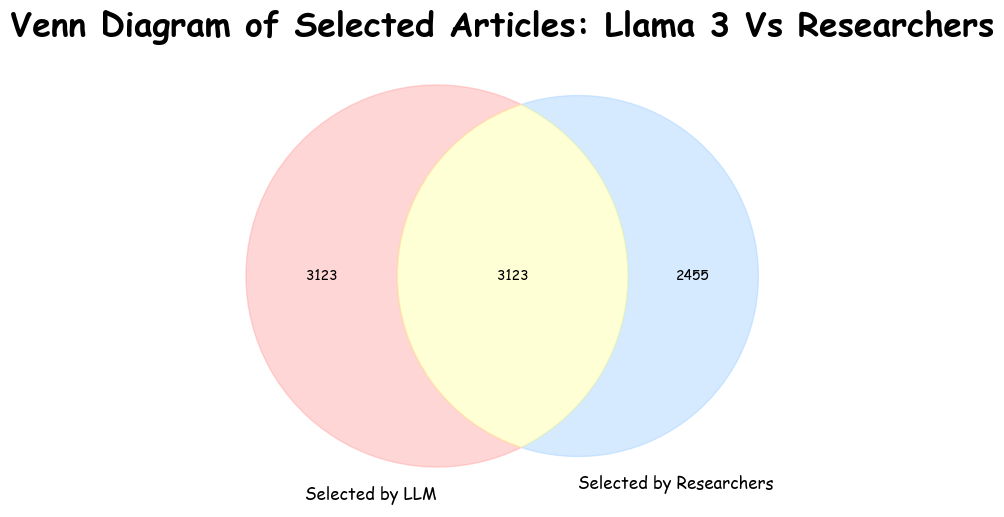

In [17]:
# Sample data: replace these values with your actual numbers
selected_not_in_screening = len(articles_df[(articles_df['Screened']== True)&(articles_df['Selected']==True)])  # Example: number of Selected articles not in Screening
selected_intersected = len(articles_df[(articles_df['Screened']== True)&(articles_df['Selected']==True)])  # Example: number of Selected Articles that are intersected with Screening
screening_not_selected = len(articles_df[(articles_df['Screened']== False)&(articles_df['Selected']==True)])  # Example: number of Screening not Selected

# Create the Venn diagram
plt.figure(figsize=(10, 6))

# Define the sets for the Venn diagram
venn_values = (selected_not_in_screening, screening_not_selected, selected_intersected)

# Draw the Venn diagram
venn = venn2(subsets=venn_values, set_labels=('Selected by LLM', 'Selected by Researchers'))

# Customize colors
venn.get_patch_by_id('10').set_color('#FF9999')  # Selected by LLM
venn.get_patch_by_id('01').set_color('#99CCFF')  # Screened by Researchers
venn.get_patch_by_id('11').set_color('#FFFF99')   # Intersection color

# Customize font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Comic Sans MS', 'Helvetica']
plt.title('Venn Diagram of Selected Articles: Llama 3 Vs Researchers', fontsize=24, fontweight='bold')

# Add grid and show the plot
plt.grid(False)
plt.show()